# C1. BIC Demo

## C1.1. Notebook setup

In [1]:
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee

plt.style.use('../thermal-gs.mplstyle')
warnings.filterwarnings('ignore')

## C1.2. Generate data

In [2]:
def BIC(y, y_pred, sigma, k):
    wt_resid = (y - y_pred)/sigma
    sse = sum(wt_resid**2) 
    df = len(y) - k
    chisq = (1/df) * sse
    return (k*np.log(len(y)) + 2*chisq)

x = np.linspace(-10, 10, 100)
p = np.polynomial.Polynomial([1, 2, -3, 4])
y0 = p(x)

np.random.seed(3141592653) # pi~ish
yerr = np.random.normal(loc=0, scale=150, size=100)
ydata = y0 + yerr

ymod = np.empty((5, 100))
for i in range(5):
    pmod = np.polynomial.Polynomial.fit(x, ydata, i+1)
    ymod[i] = pmod(x)

## C1.3. Plot

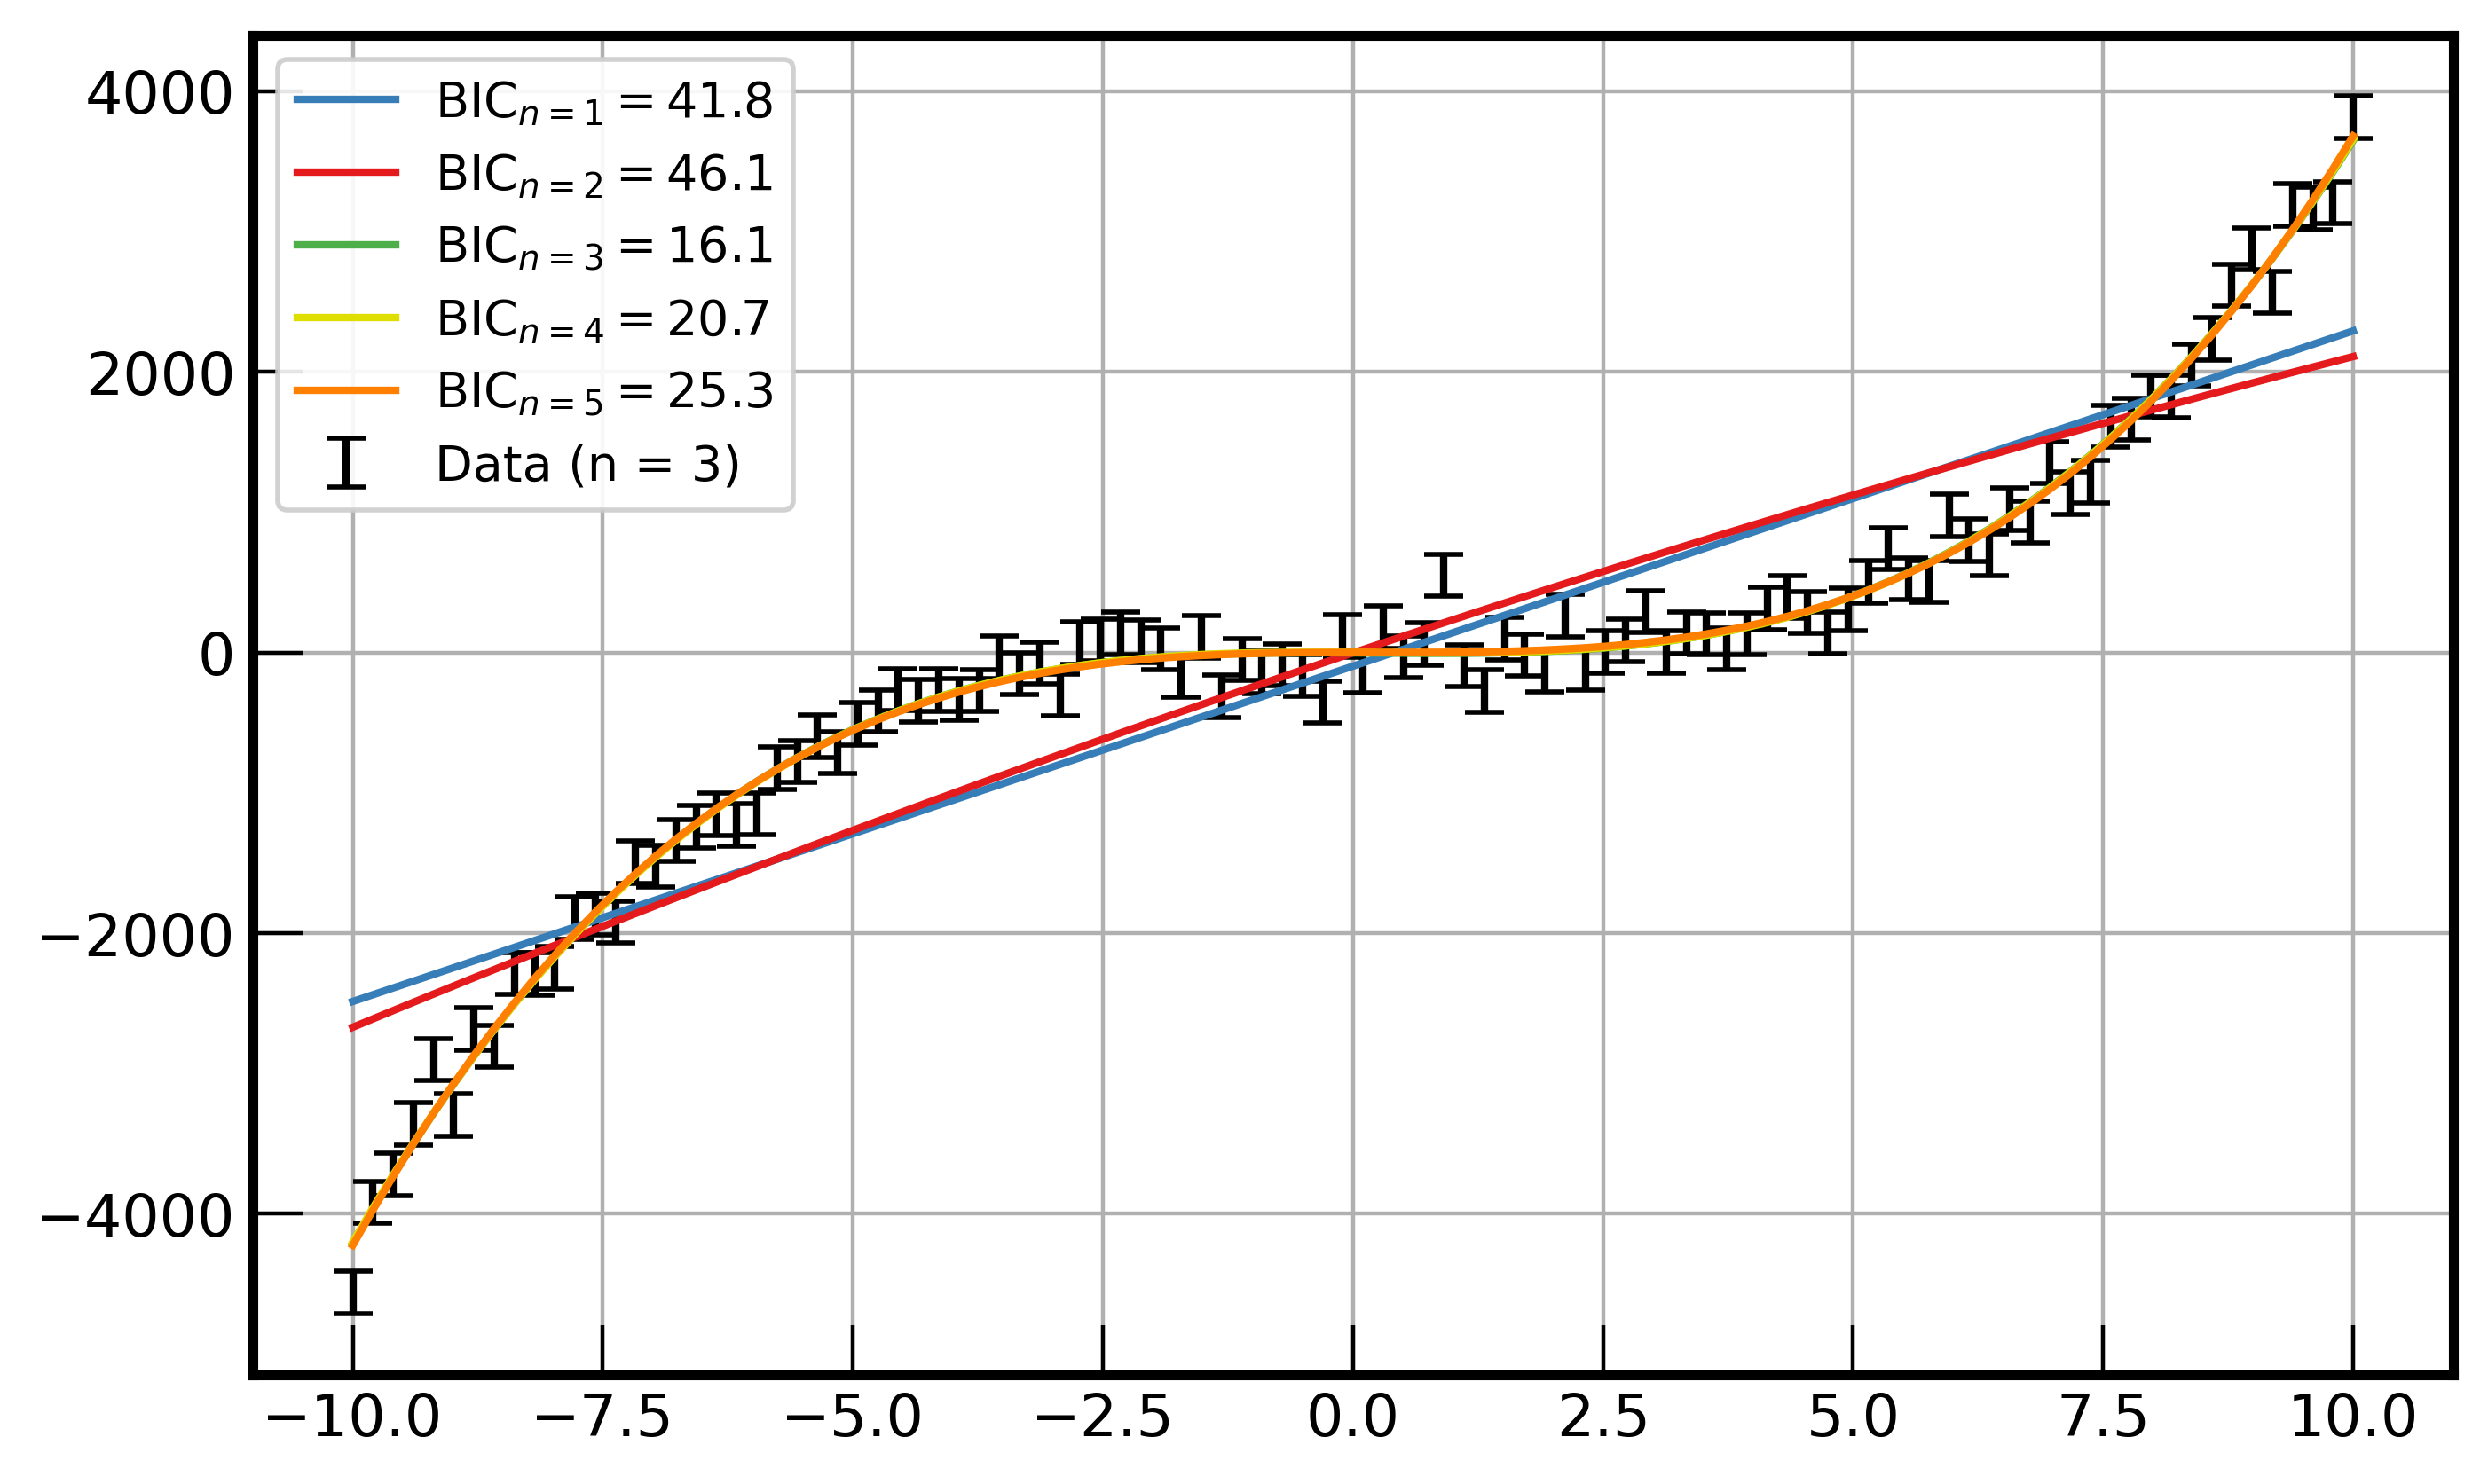

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.errorbar(x, ydata, yerr=150, color='black', ls ='none', label='Data (n = 3)')
for i in range(len(ymod)):
    ax.plot(x, ymod[i], label =r'BIC$_{n=%i}=%.1f$' % (i+1, BIC(ydata, ymod[i], 150, i+1)))

ax.legend(loc='upper left')
ax.grid()
fig.set_facecolor('white')
plt.savefig('../figures/bic.png', bbox_inches='tight')
plt.savefig('../figures/bic.pdf', bbox_inches='tight')
plt.show()